# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [2]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

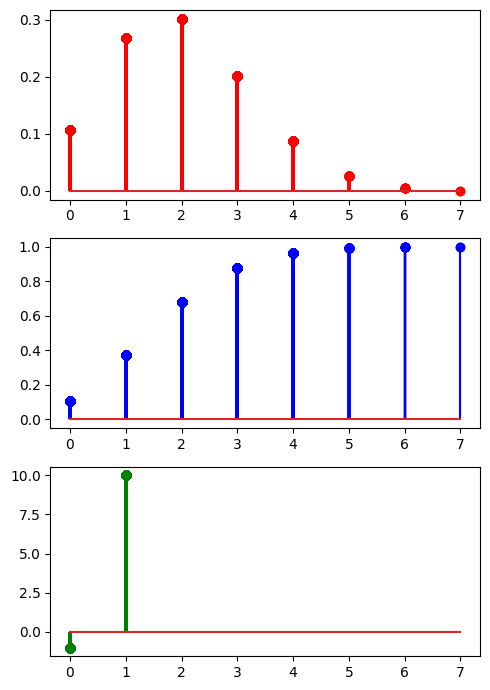

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

Probabilidad de densidad de una distribución Normal(0, 1) en x = 1: 0.24197072451914337
Probabilidad acumulada de una distribución Normal(0, 1) en x = 1: 0.8413447460685429
Cuantil en p = 0.9 una distribución Normal(0, 1): 1.2815515655446004
Generar 2000 valores aleatorios a partir de una distribución Normal(0, 1): [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


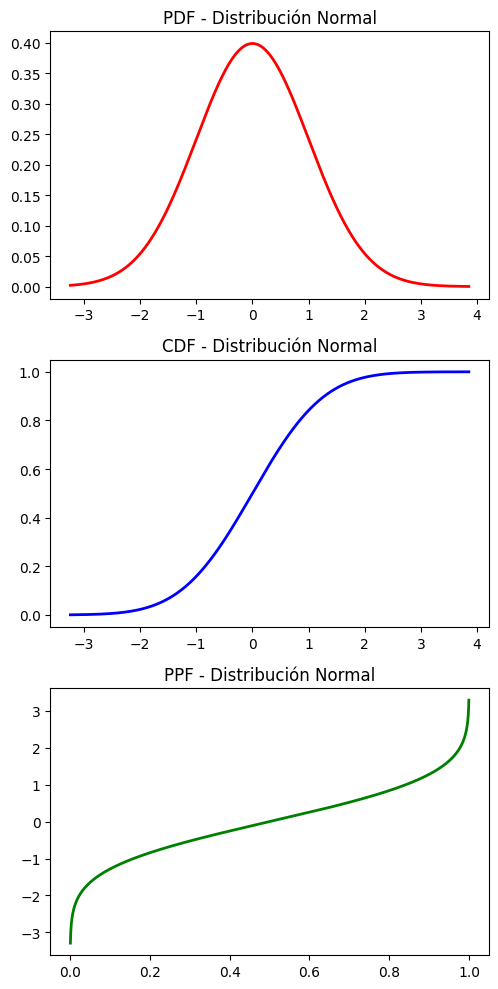

Probabilidad de densidad de una distribución Uniforme(0, 1) en x = 0.5: 1.0000
Probabilidad acumulada de una distribución Uniforme(0, 1) en x = 0.5: 0.5000
Cuantil en p = 0.9 una distribución Uniforme(0, 1): 0.9000
Generar 2000 valores aleatorios a partir de una distribución Uniforme(0, 1): [0.37454012 0.95071431 0.73199394 ... 0.06895802 0.05705472 0.28218707]


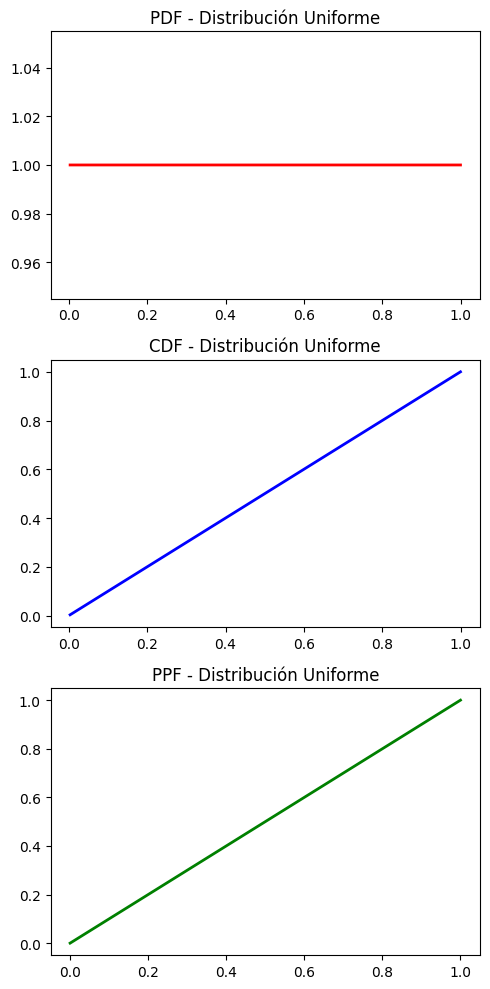

In [1]:
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt

# I- Distribución Normal (0, 1):
  
  # 1) Definir la función:
def dnorm(x, mean = 0, sd = 1):
    """
    Calcula la densidad de probabilidad (estimación puntual) de la distribución normal.
    """
    result = norm.pdf(x, loc = mean, scale = sd)
    return result

def pnorm(q, mean = 0, sd = 1):
    """
    Calcula la función de distribución acumulativa de la distribución normal.
    """
    result = norm.cdf(q, loc = mean, scale = sd)
    return result

def qnorm(p, mean = 0, sd = 1):
    """
    Calcula la función cuantil (inversa de la CDF) a partir de la distribución normal.
    """
    result = norm.ppf(p, loc = mean, scale = sd)
    return result

def rnorm(n, mean = 0, sd = 1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc = mean, scale = sd, size = n)
    return result

  # 2) 
np.random.seed(42)

mean = 0
sd = 1

print(f"Probabilidad de densidad de una distribución Normal({mean}, {sd**2}) en x = 1: {dnorm(1, mean=mean, sd=sd)}")
print(f"Probabilidad acumulada de una distribución Normal({mean}, {sd**2}) en x = 1: {pnorm(1, mean=mean, sd=sd)}")
print(f"Cuantil en p = 0.9 una distribución Normal({mean}, {sd**2}): {qnorm(0.9, mean=mean, sd=sd)}")
print(f"Generar 2000 valores aleatorios a partir de una distribución Normal({mean}, {sd**2}): {rnorm(2000, mean=mean, sd=sd)}")

  # 3) Gráficos:

np.random.seed(42)
mean = 0
sd = 1
data = rnorm(2000, mean=mean, sd=sd)

x_values = np.linspace(np.min(data), np.max(data), 2000)
pdf = dnorm(x_values, mean = mean, sd = sd)
cdf = pnorm(x_values, mean = mean, sd = sd)
ppf = qnorm(np.linspace(0, 1, 2000), mean = mean, sd = sd)

fig, axis = plt.subplots(3, 1, figsize=(5, 10))

axis[0].plot(x_values, pdf, "r-", lw = 2)
axis[0].set_title("PDF - Distribución Normal")
axis[1].plot(x_values, cdf, "b-", lw = 2)
axis[1].set_title("CDF - Distribución Normal")
axis[2].plot(np.linspace(0, 1, 2000), ppf, "g-", lw = 2)
axis[2].set_title("PPF - Distribución Normal")

plt.tight_layout()

plt.show()

# II- Distribución Uniforme:
  
  # 1) Definir la función:

def dunif(x, min = 0, max = 1):
    """
    Calcula la densidad de probabilidad (estimación puntual) de la distribución uniforme.
    """
    result = uniform.pdf(x, loc = min, scale = max-min)
    return result

def punif(q, min = 0, max = 1):
    """
    Calcula la función de distribución acumulativa de la distribución uniforme.
    """
    result = uniform.cdf(q, loc = min, scale = max-min)
    return result

def qunif(p, min = 0, max = 1):
    """
    Calcula la función cuantil (inversa de la CDF) a partir de la distribución uniforme.
    """
    result = uniform.ppf(p, loc = min, scale = max-min)
    return result

def runif(n, min = 0, max = 1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc = min, scale = max-min, size = n)
    return result

  # 2)
import numpy as np

np.random.seed(42)

min_val = 0
max_val = 1

print(f"Probabilidad de densidad de una distribución Uniforme({min_val}, {max_val}) en x = 0.5: {dunif(0.5, min=min_val, max=max_val):.4f}")
print(f"Probabilidad acumulada de una distribución Uniforme({min_val}, {max_val}) en x = 0.5: {punif(0.5, min=min_val, max=max_val):.4f}")
print(f"Cuantil en p = 0.9 una distribución Uniforme({min_val}, {max_val}): {qunif(0.9, min=min_val, max=max_val):.4f}")
print(f"Generar 2000 valores aleatorios a partir de una distribución Uniforme({min_val}, {max_val}): {runif(2000, min=min_val, max=max_val)}")

  # 3) Gráficos:

np.random.seed(42)
min_val = 0
max_val = 1
data = runif(2000, min = min_val, max = max_val)

x_values = np.linspace(np.min(data), np.max(data), 2000)
pdf = dunif(x_values, min = min_val, max = max_val)
cdf = punif(x_values, min = min_val, max = max_val)
ppf = qunif(np.linspace(0, 1, 2000), min = min_val, max  =max_val)

fig, axis = plt.subplots(3, 1, figsize=(5, 10))

axis[0].plot(x_values, pdf, "r-", lw = 2)
axis[0].set_title("PDF - Distribución Uniforme")
axis[1].plot(x_values, cdf, "b-", lw = 2)
axis[1].set_title("CDF - Distribución Uniforme")
axis[2].plot(np.linspace(0, 1, 2000), ppf, "g-", lw = 2)
axis[2].set_title("PPF - Distribución Uniforme")

plt.tight_layout()

plt.show()
